In [1]:
import pandas as pd             # For data handling and loading
import numpy as np              # For numerical operations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # The Classification Model
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder # Essential for Preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Load the  dataset
df = pd.read_csv('Logistic Regression.csv')

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Years_On_Job        5000 non-null   float64
 1   Training_Score      5000 non-null   int32  
 2   Projects_Completed  5000 non-null   int32  
 3   Manager_Rating      5000 non-null   int32  
 4   Age                 5000 non-null   int32  
 5   Gender              5000 non-null   int32  
 6   Department          5000 non-null   int32  
 7   Previous_Promotion  5000 non-null   int32  
 8   Promoted            5000 non-null   object 
dtypes: float64(1), int32(7), object(1)
memory usage: 215.0+ KB


In [75]:
print(df.shape)

(2000, 7)


In [76]:
# Count the number of missing values for every column
print(df.isnull().sum())

Years_On_Job          0
Training_Score        0
Projects_Completed    0
Manager_Rating        0
Age                   0
Gender                0
Promoted              0
dtype: int64


In [77]:
# Check for duplicate rows across ALL columns and count how many there are
total_duplicates = df.duplicated().sum()

print(f"Total number of duplicate rows: {total_duplicates}")

Total number of duplicate rows: 1


In [78]:
# Filter the DataFrame to show all rows that are duplicates (including the original)
duplicate_rows = df[df.duplicated(keep=False)]

print("The following row(s) are duplicates:")
print(duplicate_rows)

The following row(s) are duplicates:
      Years_On_Job  Training_Score  Projects_Completed  Manager_Rating  Age  Gender  Promoted
1776          10.6              72                   1               1   34       1         0
1880          10.6              72                   1               1   34       1         0


<Axes: >

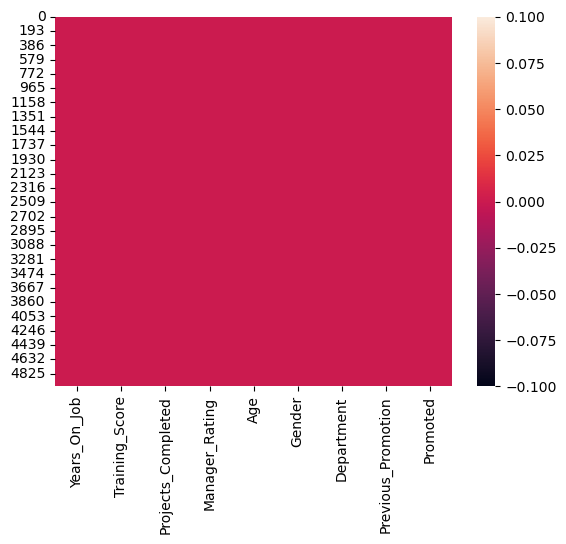

In [298]:
sns.heatmap(data.isnull())

In [299]:
# Show Independent Variables (Features)
print("--- Independent Variables (X / Features) ---")
print(X.columns.tolist())



--- Independent Variables (X / Features) ---
['Years_On_Job', 'Training_Score', 'Projects_Completed', 'Manager_Rating', 'Age', 'Gender']


In [300]:
# Show Dependent Variable (y / Target)
print("\n--- Dependent Variable (y / Target) ---")
print(y.name)


--- Dependent Variable (y / Target) ---
Promoted


In [301]:
#showe the dependent and independent varaible in table
variable_table = pd.DataFrame({
    'Variable Type': ['Dependent Variable (Target)'] + ['Independent Variable (Feature)'] * len(X.columns),
    'Column Name': [y.name] + X.columns.tolist()
})

print(variable_table)

                    Variable Type         Column Name
0     Dependent Variable (Target)            Promoted
1  Independent Variable (Feature)        Years_On_Job
2  Independent Variable (Feature)      Training_Score
3  Independent Variable (Feature)  Projects_Completed
4  Independent Variable (Feature)      Manager_Rating
5  Independent Variable (Feature)                 Age
6  Independent Variable (Feature)              Gender


In [302]:
# Assuming 'y' is your dependent variable vector (which is encoded to 0s and 1s)

print("--- Employee Promotion Counts (0=No, 1=Yes) ---")
print(y.value_counts())

--- Employee Promotion Counts (0=No, 1=Yes) ---
0    1723
1     277
Name: Promoted, dtype: int64


In [303]:
# 1. Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [304]:
# 2. Scale the features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [305]:
# Print the shape (rows, columns) of the scaled training and testing features
print("--- Training Data Shapes ---")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"y_train: {y_train.shape}")

print("\n--- Testing Data Shapes ---")
print(f"X_test_scaled: {X_test_scaled.shape}")
print(f"y_test: {y_test.shape}")

--- Training Data Shapes ---
X_train_scaled: (1600, 6)
y_train: (1600,)

--- Testing Data Shapes ---
X_test_scaled: (400, 6)
y_test: (400,)


In [ ]:


def predict_employee_promotion(employee_data_dict, model, scaler, feature_names):
    """
    Scales new employee data and predicts the Promotion outcome (Yes/No).
    """
    # 1. Format the data into a DataFrame, ensuring correct column order
    new_data_df = pd.DataFrame([employee_data_dict], columns=feature_names)
    
    # 2. Scale the new data using the fitted scaler
    new_data_scaled = scaler.transform(new_data_df)
    
    # 3. Predict the probability for class 1 (Promoted/Yes)
    probability = model.predict_proba(new_data_scaled)[0][1]
    
    # 4. Predict the final class (0 = No Promotion, 1 = Yes Promotion)
    prediction = model.predict(new_data_scaled)[0]
    
    # 5. Print the results directly
    print("--- New Employee PROMOTION Prediction ---")
    print(f"Features: {employee_data_dict}")
    print(f"Calculated Probability: {probability:.4f}")

    if prediction == 1:
        print("Final Prediction: YES, PROMOTED (1)")
    else:
        print("Final Prediction: NO, NOT PROMOTED (0)")
    
    return probability, prediction

print("Promotion prediction function is defined and ready to use.")

Promotion prediction function is defined and ready to use.


In [307]:
# Assuming X, X_train_scaled, and X_test_scaled are defined from your splitting step.

training_percentage = (training_rows / total_rows) * 100
testing_percentage = (testing_rows / total_rows) * 100

print(f"Total Rows: {total_rows}")
print("--- Split Percentage Check ---")
print(f"Training Data: {training_percentage:.2f}% ({training_rows} rows)")
print(f"Testing Data: {testing_percentage:.2f}% ({testing_rows} rows)")

Total Rows: 2000
--- Split Percentage Check ---
Training Data: 80.00% (1600 rows)
Testing Data: 20.00% (400 rows)


In [308]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model using the scaled training data
model = LogisticRegression(random_state=42, max_iter=2000)
model.fit(X_train_scaled, y_train)

print("Model Training Complete.")

Model Training Complete.


In [309]:
from sklearn.metrics import accuracy_score

# Make predictions on the unseen scaled test features
y_pred = model.predict(X_test_scaled)

# Compare the predictions (y_pred) to the actual outcomes (y_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on Test Data: {accuracy:.4f}")

Model Accuracy on Test Data: 0.8625


In [310]:
# CALL THE FUNCTION
probability, prediction = predict_employee_promotion(
    employee_data_dict={
        'Years_On_Job': 4.5, 'Training_Score': 98, 'Projects_Completed': 10,
        'Manager_Rating': 4.0, 'Age': 31, 'Gender': 0 
    },
    model=model,
    scaler=scaler,
    feature_names=X.columns.tolist() 
)


--- New Employee PROMOTION Prediction ---
Features: {'Years_On_Job': 4.5, 'Training_Score': 98, 'Projects_Completed': 10, 'Manager_Rating': 4.0, 'Age': 31, 'Gender': 0}
Calculated Probability: 0.2984
Final Prediction: NO, NOT PROMOTED (0)


In [311]:
# CALL THE FUNCTION
probability, prediction = predict_employee_promotion(
    employee_data_dict={
        'Years_On_Job': 5, 'Training_Score': 95, 'Projects_Completed': 30,
        'Manager_Rating': 5, 'Age': 25, 'Gender': 0 
    },
    model=model,
    scaler=scaler,
    feature_names=X.columns.tolist() 
)


--- New Employee PROMOTION Prediction ---
Features: {'Years_On_Job': 5, 'Training_Score': 95, 'Projects_Completed': 30, 'Manager_Rating': 5, 'Age': 25, 'Gender': 0}
Calculated Probability: 0.6213
Final Prediction: YES, PROMOTED (1)


In [ ]:
# In your main.py FastAPI file
import joblib

# Load the single pipeline object, which contains both the scaler and the model.
model_pipeline = joblib.load("employee_promotion_model.joblib")

In [ ]:
import joblib
from sklearn.pipeline import Pipeline
# You may need to import your specific model and scaler classes
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler


# --- 1. Create the Pipeline ---
# This links the scaling step and the model step together.
employee_promotion_pipeline = Pipeline([
    ('scaler', scaler),                 # Your fitted preprocessor/scaler object
    ('logistic_regression', model)      # Your fitted Logistic Regression model
])


# --- 2. Save the Pipeline to a file ---
filename = 'employee_promotion_model.joblib' 
joblib.dump(employee_promotion_pipeline, filename)

print(f"✅ Model Pipeline saved to: {filename}")